In [2]:
#print number of song files for each pre and post deafen day to determine size of training set
from analyze_songs import analyze_song

batchfile = '/opt/data/pk31gr76/batch_predf'
ff = open(batchfile)
folderlist1 = [line.rstrip() for line in ff if len(line.rstrip())>0]
ff.close()

batchfile = '/opt/data/pk31gr76/batch_postdf'
ff = open(batchfile)
folderlist2 = [line.rstrip() for line in ff if len(line.rstrip())>0]
ff.close()

path = '/opt/data/pk31gr76/'
syls1=dict() #list of all syllable data in each song file in each folder 
for folder in folderlist1:
    batchfile = path+folder+'/batch.keep'
    ff = open(batchfile)
    files1 = [line.rstrip() for line in ff]
    ff.close()
    #fils1=[x for x in os.listdir(path+folder) if x[-4:]=='cbin' and 'hp' not in x]
    syls_in_folder = []
    for fil in files1:
        song,syls,song_data = analyze_song(path+folder+'/'+fil,use_evsonganaly=True,filetype='cbin')
        syls_in_folder.append(syls)
    syls1[folder] = (syls_in_folder)

syls2 = dict()
for folder in folderlist2:
    batchfile = path+folder+'/batch.keep'
    ff = open(batchfile)
    files2 = [line.rstrip() for line in ff]
    ff.close()
    #fils2=[x for x in os.listdir(path+folder) if x[-4:]=='cbin' and 'hp' not in x]
    syls_in_folder = []
    for fil in files2:
        song,syls,song_data = analyze_song(path+folder+'/'+fil,use_evsonganaly=True,filetype='cbin')
        syls_in_folder.append(syls)
    syls2[folder] = syls_in_folder

In [3]:
predf_days =syls1.keys()
postdf_days = syls2.keys()

In [4]:
numsyls_per_day = []
for x in folderlist1:
    numsyls = 0
    for y in syls1[x]:
        numsyls += len(y)
    numsyls_per_day.append(numsyls)
    print x, numsyls,'syllables'

for x in folderlist2:
    numsyls = 0
    for y in syls2[x]:
        numsyls += len(y)
    numsyls_per_day.append(numsyls)
    print x, numsyls,'syllables'

print 'minimum number of syllables per day:',min(numsyls_per_day)

saline_7_7_2016 6253 syllables
saline_7_8_2016 2735 syllables
naspm_7_8_2016 11602 syllables
saline_8_9_2016 6378 syllables
saline_8_10_2016 2765 syllables
naspm_8_10_2016 10462 syllables
saline_8_15_2016 758 syllables
saline_8_16_2016 508 syllables
naspm_8_16_2016 1823 syllables
saline_8_17_2016 917 syllables
saline_8_18_2016 523 syllables
naspm_8_18_2016 2840 syllables
saline_8_19_2016 332 syllables
saline_8_20_2016 153 syllables
naspm_8_20_2016 764 syllables
saline_8_21_2016 583 syllables
saline_8_22_2016 295 syllables
saline_8_23_2016 36 syllables
saline_8_24_2016 306 syllables
naspm_8_24_2016 1149 syllables
saline_8_25_2016 252 syllables
saline_8_26_2016 354 syllables
naspm_8_26_2016 2677 syllables
saline_8_27_2016 538 syllables
saline_8_28_2016 547 syllables
naspm_8_29_2016 757 syllables
saline_8_30_2016 226 syllables
saline_8_31_2016 77 syllables
minimum number of syllables per day: 36


In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


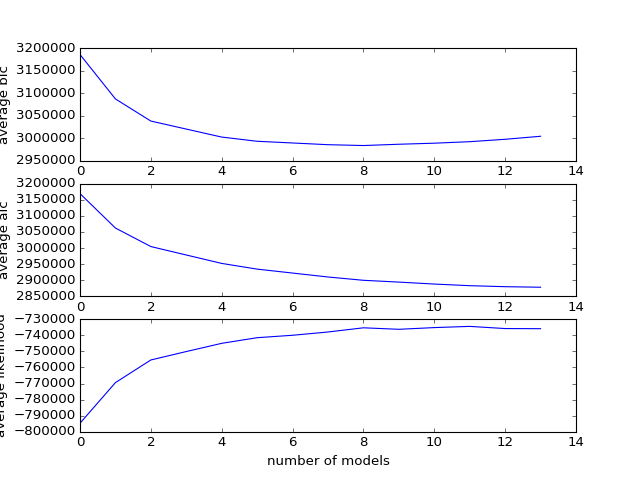

<IPython.core.display.Javascript object>


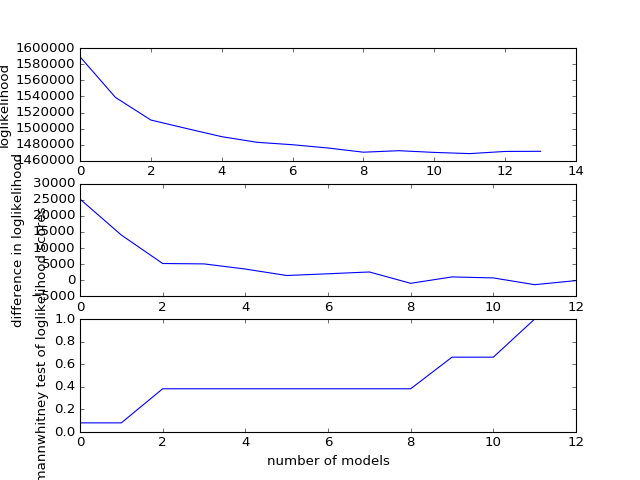

likelihood optimal k
2
optimal k
10
{'min_covar': 0.001, 'verbose': 0, 'covariance_type': 'full', 'n_iter': 100000, 'random_state': None, 'params': 'wmc', 'n_init': 10, 'tol': 0.001, 'thresh': None, 'init_params': 'wmc', 'n_components': 10}
288.777030945


In [24]:
#determine  number of models from pre-deaf data with unconstrained set size
import sylcluster_gaussian_mixture_expectation_max_dbscan_kfoldcv_noplot_50x as gmm
reload(gmm)
setsize = 'all'
syls = [sylls for files in syls1[predf_days[0]] for sylls in files]
_,_,scores,bic,likli = gmm.EMofgmmcluster(syls,setsize)

<IPython.core.display.Javascript object>


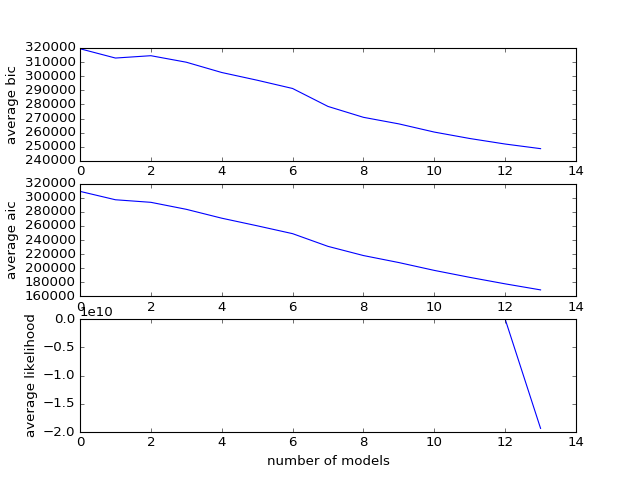

<IPython.core.display.Javascript object>


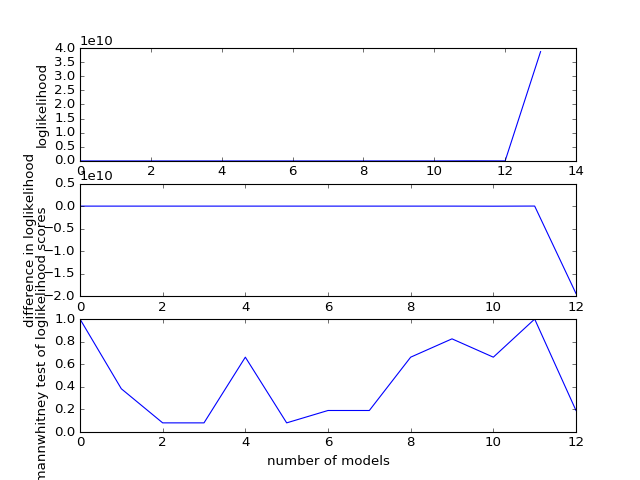

likelihood optimal k
2
optimal k
15
{'min_covar': 0.001, 'verbose': 0, 'covariance_type': 'full', 'n_iter': 100000, 'random_state': None, 'params': 'wmc', 'n_init': 10, 'tol': 0.001, 'thresh': None, 'init_params': 'wmc', 'n_components': 15}
12.1629350185


In [23]:
#determine  number of models from pre-deaf data with constrained set size to 200 (training set) 400 (test set)
import sylcluster_gaussian_mixture_expectation_max_dbscan_kfoldcv_noplot_50x as gmm
reload(gmm)
setsize = 200
syls = [sylls for files in syls1[predf_days[0]] for sylls in files]
_,_,scores,bic,likli = gmm.EMofgmmcluster(syls,setsize)
#therefore, cannot use training set size of 200 

In [92]:
#compute KL divergence scores for pre-deaf data based on model on one pre-deaf day
#use nummodel = 9, test set and train set size are unconstrained (half of available data for each day)
import sylcluster_comparison_bidirectional_known_k as compare
reload(compare)
lostinfo1 = dict()
gaininfo1 = dict()
basedata = folderlist1[0]
for x in range(len(folderlist1)):
    song1 = [sylls for files in syls1[basedata] for sylls in files]
    song2 = [sylls for files in syls1[folderlist1[x]] for sylls in files]
    print len(song1), len(song2)
    score1,score2,sem1,sem2 = compare.comparesongs(song1,song2,9,9,'half')
    lostinfo1[predf_days[x]] = (score1,sem1)
    gaininfo1[predf_days[x]] = (score2,sem2)
    

6253 6253
6253 2735
6253 11602
6253 6378
6253 2765
6253 10462


In [93]:
for x in folderlist1:
    print x,'information lost:',lostinfo1[x]
    print x,'information gained:',gaininfo1[x]

saline_7_7_2016 information lost: (0.0035937780474553666, 0.00049265259394534755)
saline_7_7_2016 information gained: (-0.0087752837946286234, -0.0003626889179732938)
saline_7_8_2016 information lost: (0.6123603873817326, -0.0082720644243514958)
saline_7_8_2016 information gained: (0.28971652484566507, -0.0037501269215712324)
naspm_7_8_2016 information lost: (0.065308590906344402, -0.0012050066996745473)
naspm_7_8_2016 information gained: (-0.0011800190514733684, 0.0008355878078692905)
saline_8_9_2016 information lost: (0.088096391056709369, -0.0029267394824419924)
saline_8_9_2016 information gained: (0.11126239509213334, -0.000129672711964604)
saline_8_10_2016 information lost: (0.43441409425685512, -0.003541273100867345)
saline_8_10_2016 information gained: (0.29531270729884845, -0.0027893905177458801)
naspm_8_10_2016 information lost: (0.43886882832059176, -0.006222694780533943)
naspm_8_10_2016 information gained: (0.22358617415389884, -0.0015762615999378347)


In [94]:
lostinfo2 = dict()
gaininfo2 = dict()
for x in range(len(folderlist2)):
    song1 = [sylls for files in syls1[basedata] for sylls in files]
    song2 = [sylls for files in syls2[folderlist2[x]] for sylls in files]
    while len(song2) < 300 and x+1 <= len(folderlist2)-1:
        if 'saline' in folderlist2[x+1]:
            song2.extend([sylls for files in syls2[folderlist2[x+1]] for sylls in files])
        else:
            break
    if len(song2) < 300:
        continue
    print len(song1), len(song2)
    score1,score2,sem1,sem2 = compare.comparesongs(song1,song2,9,9,'half')
    lostinfo2[folderlist2[x]] = (score1,sem1)
    gaininfo2[folderlist2[x]] = (score2,sem2)

6253 758
6253 508
6253 1823
6253 917
6253 523
6253 2840
6253 332
6253 764
6253 583
6253 331
6253 342
6253 306
6253 1149
6253 606
6253 354
6253 2677
6253 538
6253 547
6253 757
6253 303
6253 981


In [95]:
for x in folderlist2:
    if x not in lostinfo2.keys():
        continue
    else:
        print x,'information lost:',lostinfo2[x]
        print x,'information gained:',gaininfo2[x]

saline_8_15_2016 information lost: (1.5619099837211363, -0.021228681285023067)
saline_8_15_2016 information gained: (0.3734819352492928, 0.0063995134556311924)
saline_8_16_2016 information lost: (3.0132409955862625, -0.044543785128932943)
saline_8_16_2016 information gained: (0.4678671646609272, -0.0034263271276469918)
naspm_8_16_2016 information lost: (1.0780990286322827, -0.017562908410392618)
naspm_8_16_2016 information gained: (0.40605596117375342, -0.0024946212116554668)
saline_8_17_2016 information lost: (3.1463679823312316, -0.086719736875088924)
saline_8_17_2016 information gained: (0.42761588829320912, 0.022181073654005498)
saline_8_18_2016 information lost: (1.6365069565340815, -0.029021629196592194)
saline_8_18_2016 information gained: (0.38984368872722475, 0.0052437479775886671)
naspm_8_18_2016 information lost: (0.80044679198727453, -0.01054139194336378)
naspm_8_18_2016 information gained: (0.41530088758896588, -0.0031091535238697184)
saline_8_19_2016 information lost: (1.

<IPython.core.display.Javascript object>


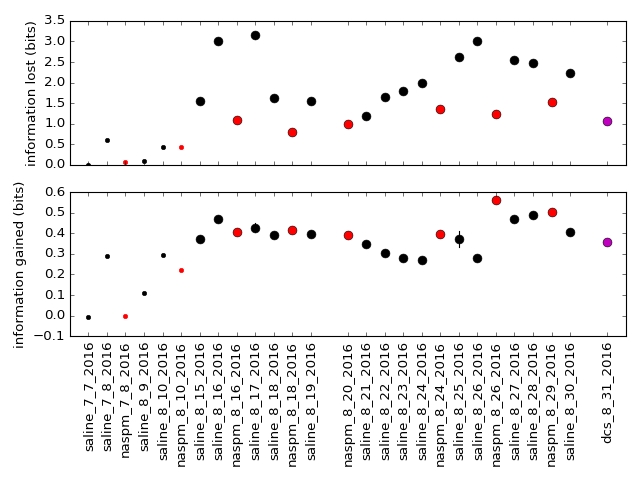

In [115]:
plt.figure()
plt.subplot(2,1,1)
xticks = []
xticklabel = []
for x in range(len(folderlist1)):
    if 'naspm' in folderlist1[x]:
        mrkcolor = 'r'
    else:
        mrkcolor = 'k'
    ind = x+1
    plt.plot(ind,lostinfo1[folderlist1[x]][0],marker='.',color=mrkcolor,markersize=8)
    plt.plot([ind,ind],[lostinfo1[folderlist1[x]][0]+lostinfo1[folderlist1[x]][1],
                        lostinfo1[folderlist1[x]][0]-lostinfo1[folderlist1[x]][1]],color=mrkcolor)
    xticks.extend([ind])
    xticklabel.extend([folderlist1[x]])
for x in range(len(folderlist2)):
    if folderlist2[x] not in lostinfo2.keys():
        continue
    if 'naspm' in folderlist2[x]:
        mrkcolor = 'r'
    elif 'dcs' in folderlist2[x]:
        mrkcolor = 'm'
    else:
        mrkcolor = 'k'
    ind = x+1+len(folderlist1)
    plt.plot(ind,lostinfo2[folderlist2[x]][0],marker='o',color=mrkcolor,markersize=8)
    plt.plot([ind,ind],[lostinfo2[folderlist2[x]][0]+lostinfo2[folderlist2[x]][1],
                        lostinfo2[folderlist2[x]][0]-lostinfo2[folderlist2[x]][1]],color=mrkcolor)
    xticks.extend([ind])
    xticklabel.extend([folderlist2[x]])
plt.ylabel('information lost (bits)')
plt.xticks(xticks,'')
plt.show()

plt.subplot(2,1,2)
xticks = []
xticklabel = []
for x in range(len(folderlist1)):
    if 'naspm' in folderlist1[x]:
        mrkcolor = 'r'
    else:
        mrkcolor = 'k'
    ind = x+1
    plt.plot(ind,gaininfo1[folderlist1[x]][0],marker='.',color=mrkcolor,markersize=8)
    plt.plot([ind,ind],[gaininfo1[folderlist1[x]][0]+gaininfo1[folderlist1[x]][1],
                        gaininfo1[folderlist1[x]][0]-gaininfo1[folderlist1[x]][1]],color=mrkcolor)
    xticks.extend([ind])
    xticklabel.extend([folderlist1[x]])
for x in range(len(folderlist2)):
    if folderlist2[x] not in gaininfo2.keys():
        continue
    if 'naspm' in folderlist2[x]:
        mrkcolor = 'r'
    elif 'dcs' in folderlist2[x]:
        mrkcolor = 'm'
    else:
        mrkcolor = 'k'
    ind = x+1+len(folderlist1)
    plt.plot(ind,gaininfo2[folderlist2[x]][0],marker='o',color=mrkcolor,markersize=8)
    plt.plot([ind,ind],[gaininfo2[folderlist2[x]][0]+gaininfo2[folderlist2[x]][1],
                        gaininfo2[folderlist2[x]][0]-gaininfo2[folderlist2[x]][1]],color=mrkcolor)
    xticks.extend([ind])
    xticklabel.extend([folderlist2[x]])
plt.ylabel('information gained (bits)')
plt.xticks(xticks,xticklabel,rotation='vertical')    
plt.show()
plt.tight_layout()


In [116]:
#compute KL divergence scores for pre-deaf data based on model on one pre-deaf day
#use nummodel = 9, test set is constrained to 200 syllables
import sylcluster_comparison_bidirectional_known_k as compare
reload(compare)
lostinfo1 = dict()
gaininfo1 = dict()
basedata = folderlist1[0]
for x in range(len(folderlist1)):
    song1 = [sylls for files in syls1[basedata] for sylls in files]
    song2 = [sylls for files in syls1[folderlist1[x]] for sylls in files]
    print len(song1), len(song2)
    score1,score2,sem1,sem2 = compare.comparesongs(song1,song2,9,9,200)
    lostinfo1[predf_days[x]] = (score1,sem1)
    gaininfo1[predf_days[x]] = (score2,sem2)

6253 6253
6253 2735
6253 11602
6253 6378
6253 2765
6253 10462


In [117]:
for x in folderlist1:
    print x,'information lost:',lostinfo1[x]
    print x,'information gained:',gaininfo1[x]

saline_7_7_2016 information lost: (0.00053210601079980839, -0.00083453460724720614)
saline_7_7_2016 information gained: (-0.013332645713792985, 0.00234904536605047)
saline_7_8_2016 information lost: (0.41439486562372951, -0.013370333422423884)
saline_7_8_2016 information gained: (0.24264623245774669, -0.0031763691400457862)
naspm_7_8_2016 information lost: (0.065909993595985344, -0.0044116922374313298)
naspm_7_8_2016 information gained: (0.002425578441858658, -0.00045800490368229737)
saline_8_9_2016 information lost: (0.076624489295172044, -0.026031597050079652)
saline_8_9_2016 information gained: (0.096060382658814572, 0.0068137186626805908)
saline_8_10_2016 information lost: (0.61926480154584762, -0.036241756370374384)
saline_8_10_2016 information gained: (0.30940517666450806, -0.0079009589513884468)
naspm_8_10_2016 information lost: (0.57140387396876891, -0.051460030575263549)
naspm_8_10_2016 information gained: (0.27445869212024587, -0.0032769044702566715)


In [118]:
lostinfo2 = dict()
gaininfo2 = dict()
for x in range(len(folderlist2)):
    song1 = [sylls for files in syls1[basedata] for sylls in files]
    song2 = [sylls for files in syls2[folderlist2[x]] for sylls in files]
    while len(song2) < 300 and x+1 <= len(folderlist2)-1:
        if 'saline' in folderlist2[x+1]:
            song2.extend([sylls for files in syls2[folderlist2[x+1]] for sylls in files])
        else:
            break
    if len(song2) < 300:
        continue
    print len(song1), len(song2)
    score1,score2,sem1,sem2 = compare.comparesongs(song1,song2,9,9,200)
    lostinfo2[folderlist2[x]] = (score1,sem1)
    gaininfo2[folderlist2[x]] = (score2,sem2)

6253 758
6253 508
6253 1823
6253 917
6253 523
6253 2840
6253 332
6253 764
6253 583
6253 331
6253 342
6253 306
6253 1149
6253 606
6253 354
6253 2677
6253 538
6253 547
6253 757
6253 303
6253 981


In [119]:
for x in folderlist2:
    if x not in lostinfo2.keys():
        continue
    else:
        print x,'information lost:',lostinfo2[x]
        print x,'information gained:',gaininfo2[x]

saline_8_15_2016 information lost: (1.4445137303772722, -0.13000324359008697)
saline_8_15_2016 information gained: (0.50518419212383447, -0.0067976926097443983)
saline_8_16_2016 information lost: (1.9558658276188492, -0.11760422923230723)
saline_8_16_2016 information gained: (0.57623346019157184, -0.00098499638844839056)
naspm_8_16_2016 information lost: (1.0426812400448964, -0.059267683184535985)
naspm_8_16_2016 information gained: (0.45141330787455503, -0.012877666704699703)
saline_8_17_2016 information lost: (1.6936869592585513, -0.088475371711348616)
saline_8_17_2016 information gained: (0.62287695865322712, 0.003342156532916923)
saline_8_18_2016 information lost: (2.2453201153344979, -0.15980748297770231)
saline_8_18_2016 information gained: (0.45859748380491555, 0.00097171515318727206)
naspm_8_18_2016 information lost: (0.68295255195050997, -0.027279612776455381)
naspm_8_18_2016 information gained: (0.3749573009994791, -0.011856587604577626)
saline_8_19_2016 information lost: (2.

<IPython.core.display.Javascript object>


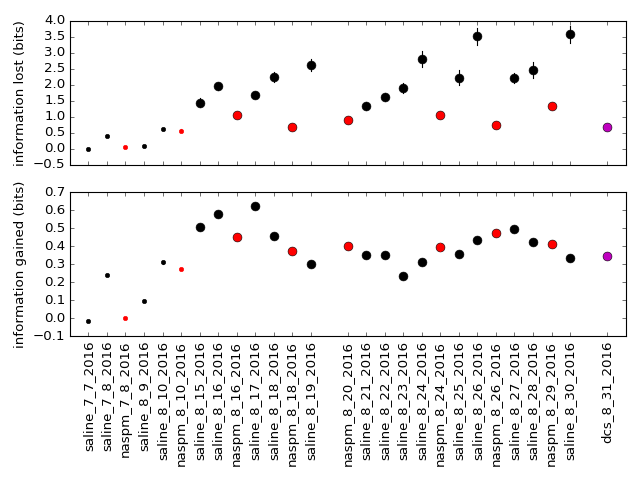

In [120]:
plt.figure()
plt.subplot(2,1,1)
xticks = []
xticklabel = []
for x in range(len(folderlist1)):
    if 'naspm' in folderlist1[x]:
        mrkcolor = 'r'
    else:
        mrkcolor = 'k'
    ind = x+1
    plt.plot(ind,lostinfo1[folderlist1[x]][0],marker='.',color=mrkcolor,markersize=8)
    plt.plot([ind,ind],[lostinfo1[folderlist1[x]][0]+lostinfo1[folderlist1[x]][1],
                        lostinfo1[folderlist1[x]][0]-lostinfo1[folderlist1[x]][1]],color=mrkcolor)
    xticks.extend([ind])
    xticklabel.extend([folderlist1[x]])
for x in range(len(folderlist2)):
    if folderlist2[x] not in lostinfo2.keys():
        continue
    if 'naspm' in folderlist2[x]:
        mrkcolor = 'r'
    elif 'dcs' in folderlist2[x]:
        mrkcolor = 'm'
    else:
        mrkcolor = 'k'
    ind = x+1+len(folderlist1)
    plt.plot(ind,lostinfo2[folderlist2[x]][0],marker='o',color=mrkcolor,markersize=8)
    plt.plot([ind,ind],[lostinfo2[folderlist2[x]][0]+lostinfo2[folderlist2[x]][1],
                        lostinfo2[folderlist2[x]][0]-lostinfo2[folderlist2[x]][1]],color=mrkcolor)
    xticks.extend([ind])
    xticklabel.extend([folderlist2[x]])
plt.ylabel('information lost (bits)')
plt.xticks(xticks,'')
plt.show()

plt.subplot(2,1,2)
xticks = []
xticklabel = []
for x in range(len(folderlist1)):
    if 'naspm' in folderlist1[x]:
        mrkcolor = 'r'
    else:
        mrkcolor = 'k'
    ind = x+1
    plt.plot(ind,gaininfo1[folderlist1[x]][0],marker='.',color=mrkcolor,markersize=8)
    plt.plot([ind,ind],[gaininfo1[folderlist1[x]][0]+gaininfo1[folderlist1[x]][1],
                        gaininfo1[folderlist1[x]][0]-gaininfo1[folderlist1[x]][1]],color=mrkcolor)
    xticks.extend([ind])
    xticklabel.extend([folderlist1[x]])
for x in range(len(folderlist2)):
    if folderlist2[x] not in gaininfo2.keys():
        continue
    if 'naspm' in folderlist2[x]:
        mrkcolor = 'r'
    elif 'dcs' in folderlist2[x]:
        mrkcolor = 'm'
    else:
        mrkcolor = 'k'
    ind = x+1+len(folderlist1)
    plt.plot(ind,gaininfo2[folderlist2[x]][0],marker='o',color=mrkcolor,markersize=8)
    plt.plot([ind,ind],[gaininfo2[folderlist2[x]][0]+gaininfo2[folderlist2[x]][1],
                        gaininfo2[folderlist2[x]][0]-gaininfo2[folderlist2[x]][1]],color=mrkcolor)
    xticks.extend([ind])
    xticklabel.extend([folderlist2[x]])
plt.ylabel('information gained (bits)')
plt.xticks(xticks,xticklabel,rotation='vertical')    
plt.show()
plt.tight_layout()

In [1]:
#running average of likelihood scores for each syllable in post df 


NameError: name 'folderlist1' is not defined